# Install and Use Cirq

In [1]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    %pip install --quiet cirq
    print("installed cirq.")

# Create & Run a Simple Circuit / NOT

In [2]:
import cirq

# One Qubit
q = cirq.NamedQubit("a")

# Create a Circuit A and NOT the qubit, then measure
circuit = cirq.Circuit(cirq.X(q), cirq.measure(q, key='measured value')  )
print("Circuit A:")
print(circuit)
print()

# Simulate the circuit 10 times
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=10)
print("Results of Circuit A:")
print(result)

Circuit A:
a: ───X───M('measured value')───

Results of Circuit A:
measured value=1111111111


# Create & Run 2 Qubits / NOT

In [3]:
# Two Qubits
q0,q1 = cirq.LineQubit.range(2)

# Create a Circuit B and NOT the qubit, use a controlled-X gate on the qubits, then measure
ops = cirq.X(q0), cirq.CNOT(q0,q1),cirq.measure(q0, key='m'),cirq.measure(q1, key='n')
circuit1 = cirq.Circuit(ops  )
print("Circuit B:")
print(circuit1)
print()

simulator = cirq.Simulator()
result = simulator.run(circuit1, repetitions=10)
print("Results of Circuit B:")
print(result)

Circuit B:
0: ───X───@───M('m')───
          │
1: ───────X───M('n')───

Results of Circuit B:
m=1111111111
n=1111111111


# Create & Run a Circuit / H

In [4]:
qubit = cirq.NamedQubit("a")

# Create a circuit which puts a qubit into superposition using H, then measure
circuit = cirq.Circuit(cirq.H(qubit), cirq.measure(qubit, key='m')  )
print("Circuit C:")
print(circuit)

# Simulate the circuit 10 times
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=10)
print("Results:")
print(result)


Circuit C:
a: ───H───M('m')───
Results:
m=0001111010


# Run and Plot Results

Circuit C:
a: ───H───M('m')───


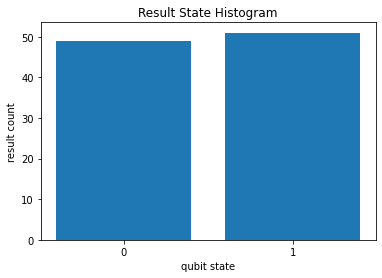

In [5]:
import matplotlib.pyplot as plt

qubit = cirq.NamedQubit("a")

# Create a circuit which puts a qubit into superposition using H, then measure
ops = [cirq.H(qubit), cirq.measure(qubit, key='m')]
circuit = cirq.Circuit(ops)
print("Circuit C:")
print(circuit)

# Simulate the circuit 100 times, plot results
result = cirq.Simulator().run(circuit, repetitions=100)
_ = cirq.vis.plot_state_histogram(result, plt.subplot())


# Use Multiple Gates

Circuit D:

a: ───H───────────────

b: ───H───@───H───M───
          │
c: ───────X───────────


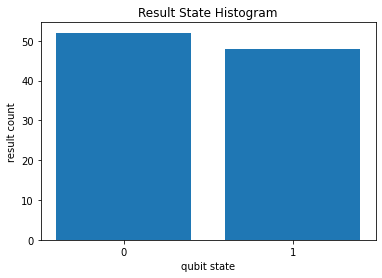

In [6]:
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")
c = cirq.NamedQubit("c")

# Create a circuit which puts qubits into superposition using H, 
# Then entangle two qubits, then measure
ops = [cirq.H(a), cirq.H(b), cirq.CNOT(b,c), cirq.H(b),cirq.measure(b)]
circuit = cirq.Circuit(ops) 
print("Circuit D:\n")
print(circuit) 

# Simulate the circuit 100 times, plot results
result = cirq.Simulator().run(circuit, repetitions=100)
_ = cirq.vis.plot_state_histogram(result, plt.subplot())
